<a href="https://colab.research.google.com/github/bagusamandira/Machine-Learning/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [ ]:
#read the data

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
#description data

print(cancer['DESCR'])

In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
#convert to tabular data

df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

In [ ]:
#check for null data
pd.isnull(df).sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
np.sum(pd.isnull(df).sum())

0

In [ ]:
#insert target  variable
cancer['target'].sum() #from the result we find that 1 is benign, 0 is malignant

357

In [ ]:
df['cancer'] = pd.DataFrame(cancer['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: xlabel='cancer', ylabel='count'>

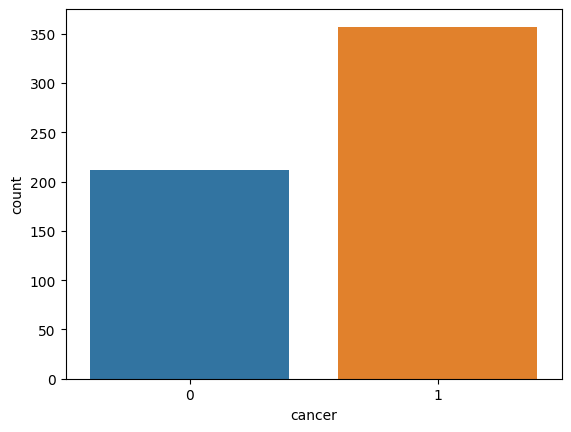

In [ ]:
#exploration

sns.countplot(x='cancer', data=df) #1 is benign, 0 is malignant

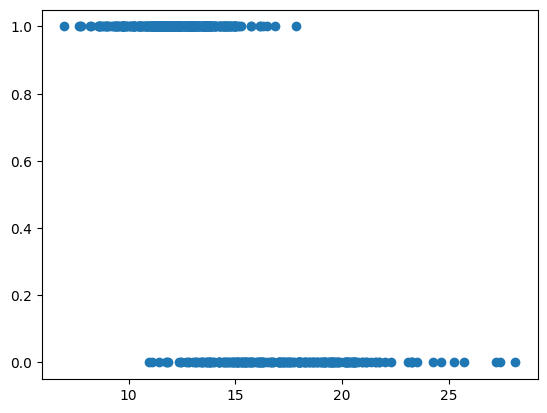

In [ ]:
plt.scatter(x=df['mean radius'], y=df['cancer'])

<Axes: xlabel='cancer', ylabel='mean radius'>

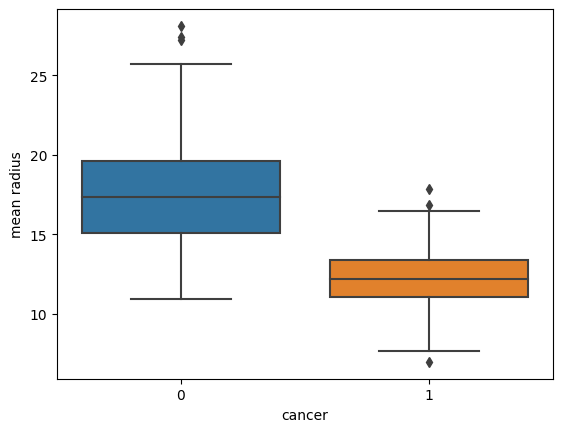

In [ ]:
sns.boxplot(x=df['cancer'], y=df['mean radius'])

In [ ]:
#boxplot all

for x in cancer['feature_names']:
  sns.boxplot(x='cancer', y=x, data=df)
  plt.figure()

In [ ]:
#split data

from sklearn.model_selection import train_test_split
df_feature = df.drop('cancer', axis = 1)
df_target = df['cancer']
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, test_size = 0.3, random_state=99)

In [ ]:
#check the data

print('x train: ', len(x_train))
print('y train: ', len(y_train))
print('x test: ', len(x_test))
print('y test: ', len(y_test))

x train:  398
y train:  398
x test:  171
y test:  171


In [ ]:
#training model

from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
#evaluation

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred = model.predict(x_test)
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

[[ 44  14]
 [  0 113]]

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        58
           1       0.89      1.00      0.94       113

    accuracy                           0.92       171
   macro avg       0.94      0.88      0.90       171
weighted avg       0.93      0.92      0.91       171



In [ ]:
#hyperparameter tuning - grid search

from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.0001],
              'C': [0.1, 1, 10, 100],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, verbose = 1, refit = True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
             verbose=1)

In [ ]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
#evaluation
pred = model.predict(x_train)
print(confusion_matrix(y_train, pred))
print()
print(classification_report(y_train, pred))

[[120  34]
 [  3 241]]

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       154
           1       0.88      0.99      0.93       244

    accuracy                           0.91       398
   macro avg       0.93      0.88      0.90       398
weighted avg       0.91      0.91      0.90       398

